In [53]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import einops
import torchvision
from torchvision import transforms
from tqdm import tqdm

In [22]:
def imshow(img, figsize=5):
    if isinstance(img, torch.Tensor):
        img = img.detach().numpy()
    img = img.squeeze()
    if img.shape[0] == 3:
        img = einops.rearrange(img, "c h w -> h w c")
    plt.imshow(img)
    plt.gcf().set_size_inches((figsize, figsize))

In [23]:
model = torchvision.models.resnet34(pretrained=True)

In [24]:
model.eval();

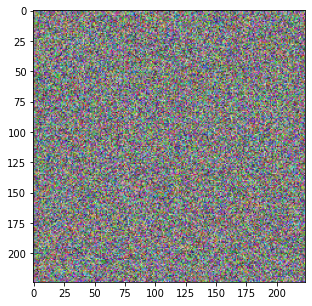

In [44]:
class ImageGen(torch.nn.Module):
    def __init__(self, h=224, w=224):
        super().__init__()
        shape = [1, 3, h, w]
        self.image = torch.nn.Parameter(torch.randn(shape))

    def forward(self):
        # return torch.clip(self.image, 0, 1)
        return torch.sigmoid(self.image)

imgout = ImageGen().forward()
imshow(imgout)

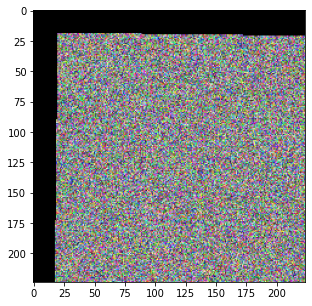

In [61]:
def make_augmented_batch(img_out, batch_size=16, degrees=5, translate=(0.1,0.1), brightness=0.1, hue=0.1):
    trans = transforms.Compose([
        transforms.RandomAffine(degrees=degrees, translate=translate),
        transforms.ColorJitter(brightness=brightness, hue=hue)
    ])
    return torch.concat([
        trans(img_out) for _ in range(batch_size)
    ], dim=0)

aug_batch = make_augmented_batch(imgout)
imshow(aug_batch[0])

100%|██████████| 200/200 [11:53<00:00,  3.57s/it]


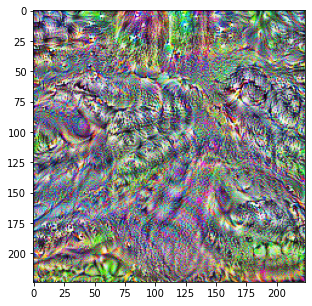

In [63]:

def train(num_steps = 200, logit = 50):
    img_gen = ImageGen()
    opt = torch.optim.Adam(img_gen.parameters(), lr=0.05)
    for i in tqdm(range(num_steps)):
        img_gen.zero_grad()
        img_out = img_gen.forward()
        aug_batch = make_augmented_batch(img_out, batch_size=8)
        loss = -model(aug_batch)[:,logit].mean()
        loss.backward()
        opt.step()
    
    imshow(img_gen.forward())

train()

100%|██████████| 200/200 [01:36<00:00,  2.07it/s]


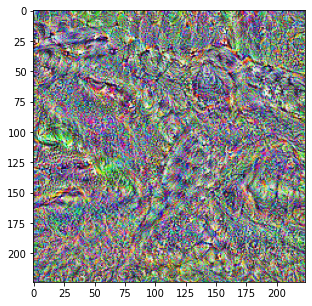

In [64]:
def train(num_steps = 200, logit = 50):
    img_gen = ImageGen()
    opt = torch.optim.Adam(img_gen.parameters(), lr=0.05)
    for i in tqdm(range(num_steps)):
        img_gen.zero_grad()
        img_out = img_gen.forward()
        aug_batch = make_augmented_batch(img_out, batch_size=1)
        loss = -model(aug_batch)[:,logit].mean()
        loss.backward()
        opt.step()
    
    imshow(img_gen.forward())

train()

In [35]:
model(imgout).shape

torch.Size([1, 1000])